# Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import data

In [4]:
dataset = pd.read_csv('avocado.csv')
dataset.shape

(18249, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Drop the first colum "Unnamed"

In [7]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Preprocessing data

In [8]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Split the Date into Month and Day

In [9]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].apply(lambda x:x.month)
dataset['Day'] = dataset['Date'].apply(lambda x:x.day)

## Drop the 'Date' column 

In [10]:
dataset.drop('Date', axis=1, inplace=True)
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Total volume')

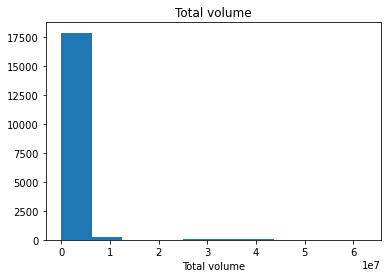

In [11]:
dataset_array = dataset.to_numpy()
volume = dataset_array[:,1]
plt.hist(volume)
plt.xlabel('Total volume')
plt.title('Total volume')

/Users/ray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

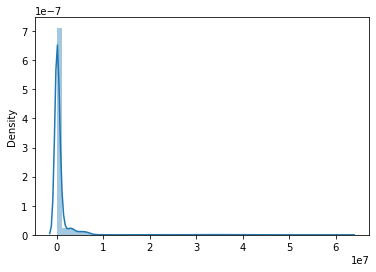

In [12]:
sns.distplot(volume)

In [13]:
dataset['region']

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [14]:
dataset_us = dataset[dataset['region'] == 'TotalUS']

Text(0.5, 1.0, 'Total volume')

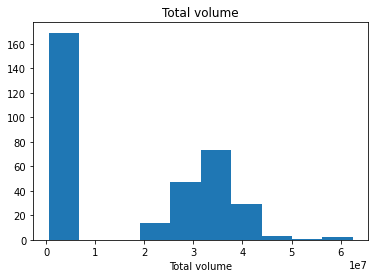

In [15]:
dataset_array = dataset_us.to_numpy()
volume = dataset_array[:,1]
plt.hist(volume)
plt.xlabel('Total volume')
plt.title('Total volume')

In [ ]:
sns.

## Drop the 'region' column, convert the type into integer

In [9]:
dataset.drop('region', axis=1, inplace=True)
dataset['type'].nunique()
dataset_2bp = pd.get_dummies(dataset)

## Delete the outliner

In [ ]:
# delete the outlinear
numeric_columns = ['AveragePrice', 'Total Volume',
                   '4046', '4225', '4770',
                   'Total Bags', 'Small Bags',
                   'Large Bags', 'XLarge Bags']


Q1 = dataset_2bp[numeric_columns].quantile(0.25)
Q3 = dataset_2bp[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

dataset_filtered = dataset_2bp[~((dataset_2bp[numeric_columns] < (Q1 - 1.5 * IQR)) |(dataset_2bp[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(dataset_filtered.shape)

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate # split data randomly into train and test subsets
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler # standarization
from sklearn import metrics

## With outliner

In [ ]:
X=dataset_2bp.iloc[:,1:14]
y=dataset_2bp['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# print(X)

# standarization
std_trans = StandardScaler()
X_train = std_trans.fit_transform(X_train)
X_test = std_trans.transform(X_test)
X.shape, y.shape

lr=LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# perform cross-validation
cv_score = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report for linear regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_lr))

X_train.shape, y_train.shape,X_test.shape, y_test.shape, pred_lr.shape

## Without outliner

In [ ]:
X=dataset_filtered.iloc[:,1:14]
y=dataset_filtered['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# print(X)

# standarization
std_trans = StandardScaler()
X_train = std_trans.fit_transform(X_train)
X_test = std_trans.transform(X_test)
X.shape, y.shape

lr=LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# perform cross-validation
cv_score = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report for linear regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_lr))

X_train.shape, y_train.shape,X_test.shape, y_test.shape, pred_lr.shape